In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\VIRAJ\Downloads\aerofit_treadmill.csv")

## Checking the structure & characteristics of the dataset -  Analysing basic metrics

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape #The dataset has 180 rows and 9 columns

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
#Checking data types of each column

df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
#Checking Stastical summary of the data

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [10]:
#On checking the dataset we found that there are no null values in any of the columns.

print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


## Non-Graphical Analysis: Value counts and unique attributes

In [11]:
df.duplicated().sum() #There are no duplicates values present

0

In [12]:
df['Product'].value_counts() #The dataset comprises of 3 differnet products on which we have to perform the analysis

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [13]:
df['Age'].value_counts().head() #We can see most of the people in the data falls in the age range of 25-28

25    25
23    18
26    12
24    12
28     9
Name: Age, dtype: int64

In [14]:
df['Income'].value_counts()

45480    14
52302     9
53439     8
54576     8
46617     8
         ..
58516     1
85906     1
29562     1
68220     1
54781     1
Name: Income, Length: 62, dtype: int64

In [15]:
df['Gender'].value_counts() #In the data number of Males are greater than Females.

Male      104
Female     76
Name: Gender, dtype: int64

In [16]:
df.Fitness.unique() #Higher number indicates good fitness while smaller number indicates less fitness

array([4, 3, 2, 1, 5], dtype=int64)

In [17]:
df.Miles.nunique()

37

In [18]:
df['Usage'].mean() #The average usage of Tread mill in our data is 3.45

3.4555555555555557

In [19]:
#Binning the income column. Creating new column to classify the people based on their income.

Income_Category = []

for row in df['Income']:
    if row < 45000:
        Income_Category.append("Lower Middle Class")
    elif row >= 45000 and row <= 60000:
        Income_Category.append("Upper Middle Class")
    else:
        Income_Category.append("Upper Class")
        
df['Income_Category'] = Income_Category

In [20]:
df['Income_Category'].value_counts()

Upper Middle Class    89
Lower Middle Class    49
Upper Class           42
Name: Income_Category, dtype: int64

In [21]:
#Classfying based on their treadmill usage.

Treadmill_usage = []

for row in df['Usage']:
    if row < df['Usage'].mean():
        Treadmill_usage.append("Low usage")
    else:
        Treadmill_usage.append("High usage")
        
df['Treadmill_usage'] = Treadmill_usage

In [22]:
df['Treadmill_usage'].value_counts() #Number of people are more who uses treadmill when compared to the average usage.

Low usage     102
High usage     78
Name: Treadmill_usage, dtype: int64

In [23]:
#Classfying based on their fitness level.

Fitness_level = []

for row in df['Fitness']:
    if row <= 3:
        Fitness_level.append("Less Fit")
    else:
        Fitness_level.append("High Fit")
        
df['Fitness_level'] = Fitness_level

In [24]:
#Checking final data after creating new categorical columns.

df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category,Treadmill_usage,Fitness_level
0,KP281,18,Male,14,Single,3,4,29562,112,Lower Middle Class,Low usage,High Fit
1,KP281,19,Male,15,Single,2,3,31836,75,Lower Middle Class,Low usage,Less Fit
2,KP281,19,Female,14,Partnered,4,3,30699,66,Lower Middle Class,High usage,Less Fit
3,KP281,19,Male,12,Single,3,3,32973,85,Lower Middle Class,Low usage,Less Fit
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower Middle Class,High usage,Less Fit
5,KP281,20,Female,14,Partnered,3,3,32973,66,Lower Middle Class,Low usage,Less Fit
6,KP281,21,Female,14,Partnered,3,3,35247,75,Lower Middle Class,Low usage,Less Fit
7,KP281,21,Male,13,Single,3,3,32973,85,Lower Middle Class,Low usage,Less Fit
8,KP281,21,Male,15,Single,5,4,35247,141,Lower Middle Class,High usage,High Fit
9,KP281,21,Female,15,Partnered,2,3,37521,85,Lower Middle Class,Low usage,Less Fit


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product          180 non-null    object
 1   Age              180 non-null    int64 
 2   Gender           180 non-null    object
 3   Education        180 non-null    int64 
 4   MaritalStatus    180 non-null    object
 5   Usage            180 non-null    int64 
 6   Fitness          180 non-null    int64 
 7   Income           180 non-null    int64 
 8   Miles            180 non-null    int64 
 9   Income_Category  180 non-null    object
 10  Treadmill_usage  180 non-null    object
 11  Fitness_level    180 non-null    object
dtypes: int64(6), object(6)
memory usage: 17.0+ KB


## Calculating Conditional and Marginal probability

#### Product purchase based on Gender

In [26]:
#Product purchase based on Gender

pd.crosstab(df['Product'],df['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


#### Product purchase based on Income category

In [27]:
pd.crosstab(df['Product'],df['Income_Category'],margins=True)

Income_Category,Lower Middle Class,Upper Class,Upper Middle Class,All
Product,,,,
KP281,34,6,40,80
KP481,15,7,38,60
KP781,0,29,11,40
All,49,42,89,180


In [28]:
df_Income_category = df[df["Income_Category"]=='Lower Middle Class']
len(df_Income_category)

49

In [29]:
df_Product_KP781 = df[(df["Product"]=='KP781') & (df["Income_Category"]=='Lower Middle Class')]
len(df_Product_KP781)

0

In [30]:
prob_purchasing_KP781_LowerMiddleClass = len(df_Product_KP781)/len(df_Income_category)
prob_purchasing_KP781_LowerMiddleClass

#Thus The probability that a Lower Middle Class Income person have a zero probability of purchasing 'KP781' which is the
#costliest treadmill having price of $2,500.

0.0

#### Product purchase based on Marital Status

In [31]:
df_MaritalStatus_Single = df[df["MaritalStatus"]=='Single']
len(df_MaritalStatus_Single)

73

In [32]:
df_MaritalStatus_Partnered = df[df["MaritalStatus"]=='Partnered']
len(df_MaritalStatus_Partnered)

107

In [33]:
df_Product_KP781_MaritalStatus_Single = df[(df["Product"]=='KP781') & (df["MaritalStatus"]=='Single')]
len(df_Product_KP781_MaritalStatus_Single)

17

In [34]:
df_Product_KP781_MaritalStatus_Partnered = df[(df["Product"]=='KP781') & (df["MaritalStatus"]=='Partnered')]
len(df_Product_KP781_MaritalStatus_Partnered)

23

In [35]:
prob_purchasing_KP781_MaritalStatus_Single = len(df_Product_KP781_MaritalStatus_Single)/len(df_MaritalStatus_Single)
prob_purchasing_KP781_MaritalStatus_Single

0.2328767123287671

In [ ]:
df_Product_KP481_MaritalStatus = df[(df["Product"]=='KP481') & (df["MaritalStatus"]=='Single')]
len(df_Product_KP481_MaritalStatus)

In [ ]:
prob_purchasing_KP481_MaritalStatus = len(df_Product_KP481_MaritalStatus)/len(df_MaritalStatus)
prob_purchasing_KP481_MaritalStatus

In [ ]:
df_Product_KP481_MaritalStatus_Partnered = df[(df["Product"]=='KP481') & (df["MaritalStatus"]=='Partnered')]
len(df_Product_KP481_MaritalStatus_Partnered)

In [ ]:
prob_purchasing_KP481_MaritalStatus_Partnered = len(df_Product_KP481_MaritalStatus_Partnered)/len(df_MaritalStatus_Partnered)
prob_purchasing_KP481_MaritalStatus_Partnered

#We can infer that Probability of purchasing KP481 for Single and Partnered is almost same i.e., 0.32

#### What is the probability of a male customer buying a KP781 treadmill?

In [ ]:
df_Gender_Male = df[df["Gender"]=='Male']
len(df_Gender_Male)

In [ ]:
df_purchasing_KP781_Male = df[(df["Product"]=='KP781') & (df["Gender"]=='Male')]
len(prob_purchasing_KP781_Male)

In [ ]:
Prob_purchasing_KP781_Male = len(prob_purchasing_KP781_Male)/len(df_Gender_Male)
Prob_purchasing_KP781_Male

#The probability of a Male purchasing KP781 is 0.31

## Visual Analysis - Continuous variables

#### Analysis of Fitness level based on Marital Status

Text(0.5, 1.0, 'Fitness level based on Marital status')

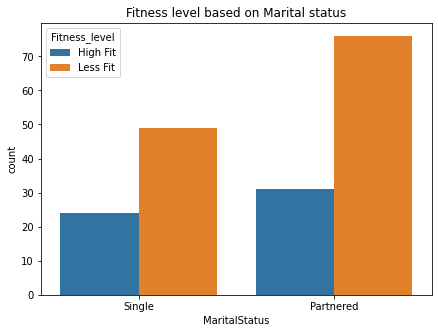

In [37]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df,x='MaritalStatus',hue='Fitness_level',ax=ax)
plt.title("Fitness level based on Marital status")

#### Distance covered on treadmill

Text(0.5, 1.0, 'Most Miles covered on treadmill')

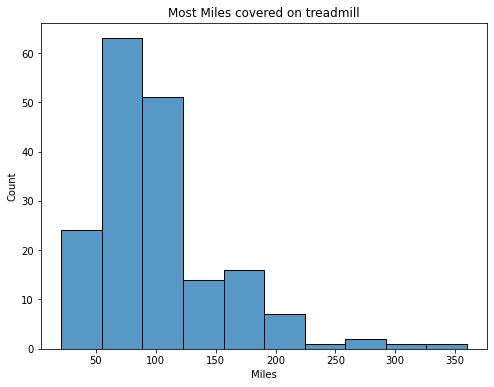

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['Miles'],bins=10,ax=ax)
plt.title("Most Miles covered on treadmill")

#### Usage of treadmill based on Age

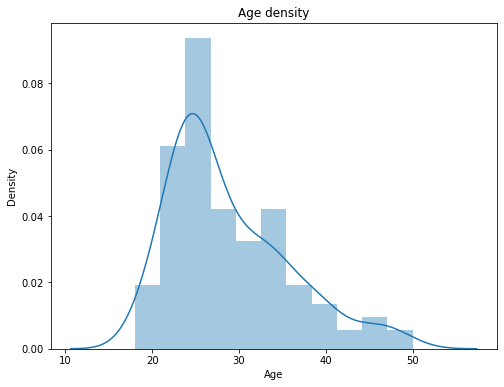

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['Age'],ax=ax)
plt.title("Age density")
plt.show()

## Visual Analysis - Categorical variables

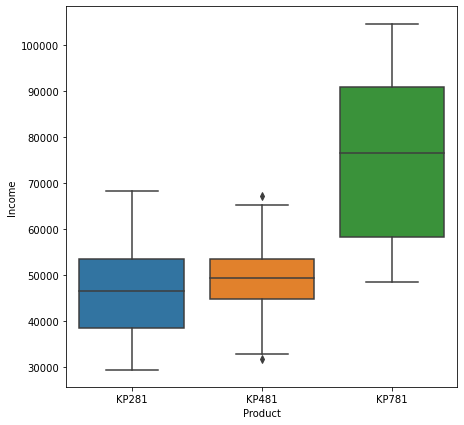

In [40]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=df,x='Product',y='Income',ax=ax)
plt.show()

#### Fitness level based on treadmill usage

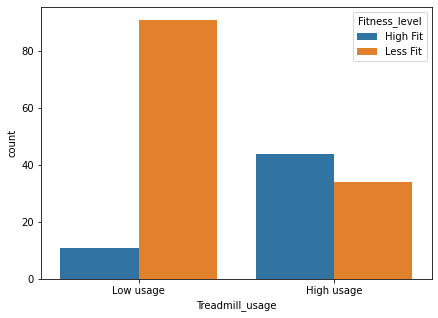

In [41]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data=df,x='Treadmill_usage',hue='Fitness_level',ax=ax)

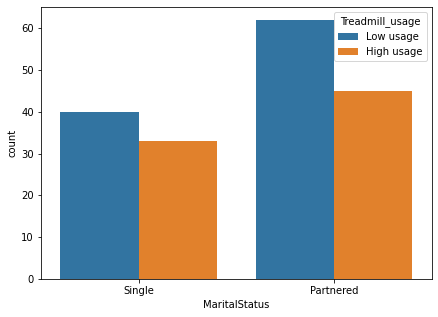

In [42]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data=df,x='MaritalStatus',hue='Treadmill_usage')

## For correlation

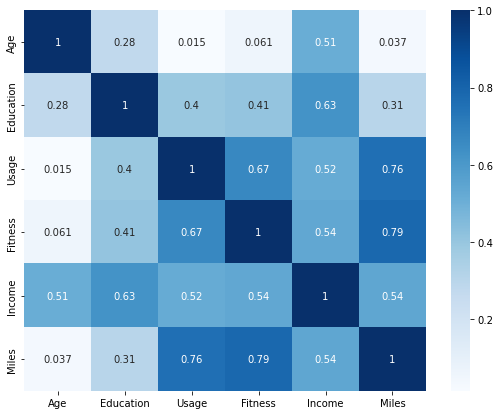

In [43]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(), cmap="Blues", annot=True,ax=ax)
plt.show()

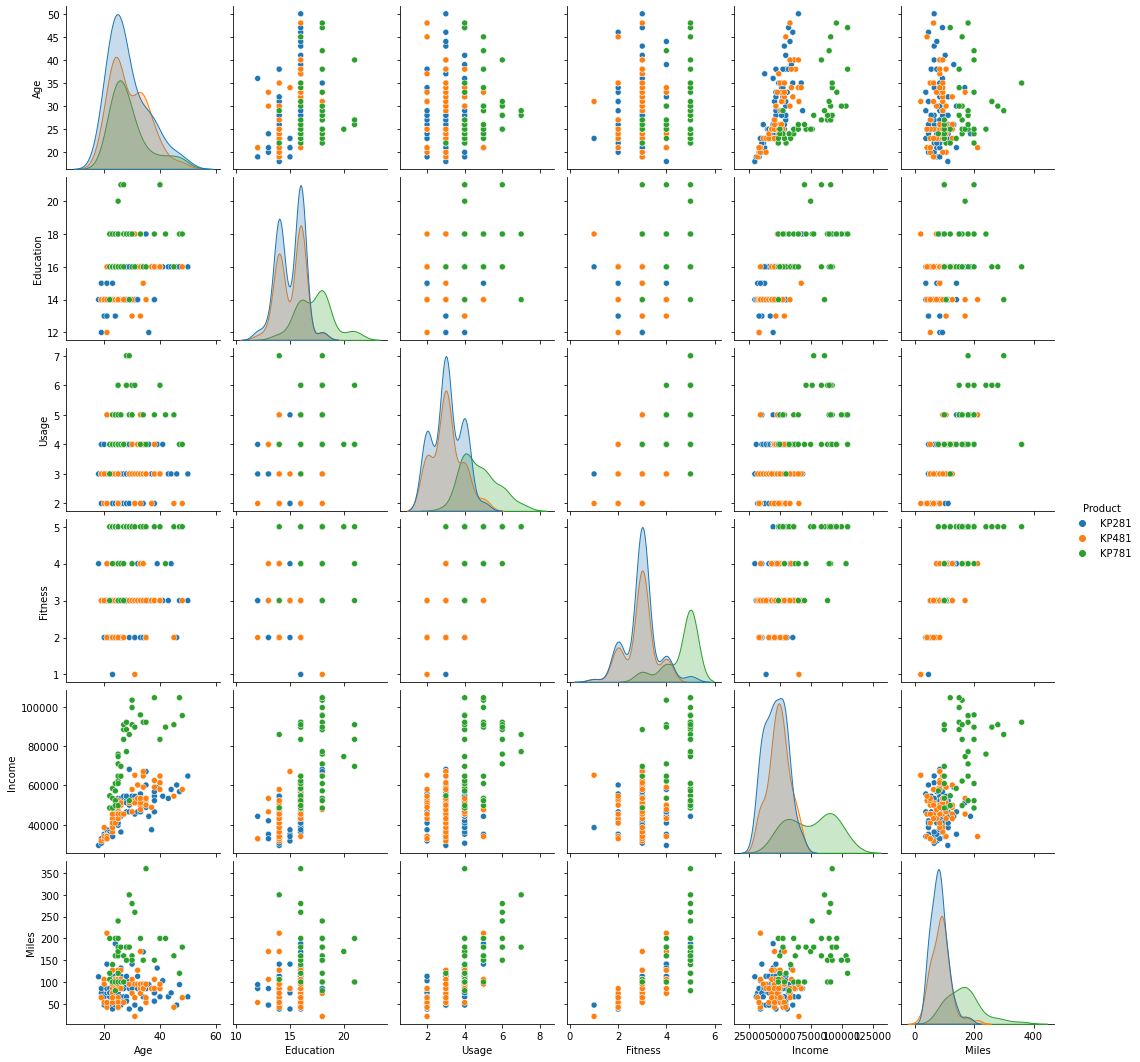

In [44]:
#High-level overview of the data based on all three treadmills.

sns.pairplot(data=df,hue="Product")
plt.show()

## Missing Value & Outlier Detection

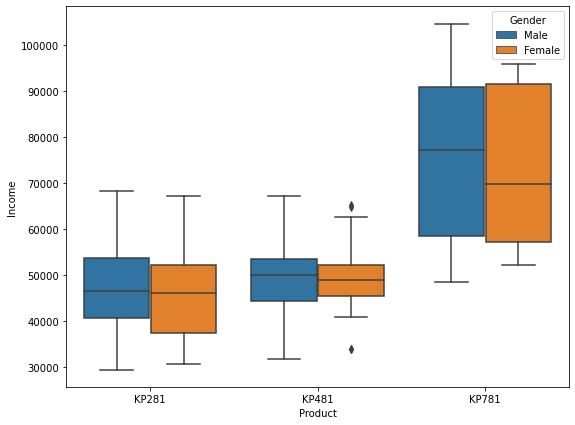

In [45]:
fig, ax = plt.subplots(figsize=(9, 7))
Outlier = pd.read_csv(r"C:\Users\VIRAJ\Downloads\aerofit_treadmill.csv")
x = "Product"
y = "Income"
hue_val = "Gender"
ax = sns.boxplot(x=x, y=y, hue=hue_val, data=Outlier,ax=ax)

#We can see there is an outlier for Product KP481 for Female purchase.

In [46]:
Outlier.groupby([x,hue_val])[y].describe()

count          mean           std      min       25%      50%  \
Product Gender                                                                  
KP281   Female   40.0  46020.075000   9226.214704  30699.0  37521.00  46048.5   
        Male     40.0  46815.975000   9022.407705  29562.0  40647.75  46617.0   
KP481   Female   29.0  49336.448276   7984.486277  34110.0  45480.00  48891.0   
        Male     31.0  48634.258065   9356.202876  31836.0  44343.00  50028.0   
KP781   Female    7.0  73633.857143  19009.925227  52291.0  57271.00  69721.0   
        Male     33.0  75825.030303  18675.002521  48556.0  58516.00  77191.0   

                     75%       max  
Product Gender                      
KP281   Female  52302.00   67083.0  
        Male    53723.25   68220.0  
KP481   Female  52302.00   65220.0  
        Male    53439.00   67083.0  
KP781   Female  91508.50   95866.0  
        Male    90886.00  104581.0

## Business Insights based on Non-Graphical and Visual Analysis

#### 1) The mean age, Usage of threadmill, Fitness and Income is 28.78, 3.45, 3.31 and 53719.57 respectively.
#### 2) The best selling threadmill is 'KP281'.
#### 3) From our analysis based on 'Treadmill usage and their fitness level' it was found that people who use less treadmill are less fit and people with more usage are more fit.
#### 4) The probability of a male customer buying a KP781 treadmill is 0.31.
#### 5) The purchase of KP781 which is the advanced and costliest treadmill is purchased by only Upper middle and Upper class people based on their Income. Infact there were zero purchases of KP781 by Lower class people.
#### 6) KP781 product was purchased the most by Males which is 33 and Females is 7.
#### 7) The Probability of purchasing KP481 product for Single and Partnered is almost same i.e., 0.32.
#### 8) Age range 25-28 uses the most treadmill while people with age above 40 uses very less.
#### 9) The usage and fitness of a person with high education is greater compared to a person with less education.

## Recommendations

#### 1) KP781 has most of the advanced features but due to high cost its sales is the least. Aerofit can give some discounts/offers occassionaly so that the sales can be increased which can benefit the company.
#### 2) Aerofit can organize fitness camp or competition where they can provide some discount coupons to the winners which can increase their customer acquisition.
#### 3) In order to increase the usage time of the treadmill Aerofit can try to implement new features which can increase the time spent on the treadmill eventually increasing the average miles covered per person.
#### 4) The usage is even more less in case of Partnered as compared to singles. Aerofit can try to lauch a new product which can be used easily by both genders and is user friendly.